### Importing Libraries

In [244]:
# The basic Libraries
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# interactive widgets
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

# Interactive Shells
from IPython.display import display

# setting up the chart size and background
plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')

# To supress warnings
import warnings
warnings.filterwarnings('ignore')

### Read the Dataset

In [245]:
data = pd.read_csv('C:/Users/Dell/Desktop/movie_metadata.csv')
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [246]:
# check the shape
print(data.shape)

(5043, 28)


### Data Cleaning

In [247]:
# Remove unnecassary columns from the dataset
data = data.drop(['color','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','cast_total_facebook_likes','facenumber_in_poster','content_rating','country','movie_imdb_link','aspect_ratio','plot_keywords',],axis=1)
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'budget',
       'title_year', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

In [248]:
# checking for missing values
data.isnull().sum()

director_name             104
num_critic_for_reviews     50
duration                   15
actor_2_name               13
gross                     884
genres                      0
actor_1_name                7
movie_title                 0
num_voted_users             0
actor_3_name               23
num_user_for_reviews       21
language                   12
budget                    492
title_year                108
imdb_score                  0
movie_facebook_likes        0
dtype: int64

In [249]:
# 'gross' and 'budget' columns have large number of missing values. 
# drop all those rows with NaNs in those columns
data = data[~np.isnan(data['gross'])]
data = data[~np.isnan(data['budget'])]
data.isnull().sum()

director_name              0
num_critic_for_reviews     1
duration                   1
actor_2_name               5
gross                      0
genres                     0
actor_1_name               3
movie_title                0
num_voted_users            0
actor_3_name              10
num_user_for_reviews       0
language                   3
budget                     0
title_year                 0
imdb_score                 0
movie_facebook_likes       0
dtype: int64

In [250]:
# Impute missing values
data['num_critic_for_reviews'].fillna(data['num_critic_for_reviews'].mean() ,inplace=True)
data['duration'].fillna(data['duration'].mean() ,inplace=True)
data['actor_2_name'].fillna('Unknown Actor',inplace=True)
data['actor_1_name'].fillna('Unknown Actor',inplace=True)
data['actor_3_name'].fillna('Unknown Actor',inplace=True)
data['language'].fillna(data['language'].mode()[0] ,inplace=True)
data.isnull().sum()

director_name             0
num_critic_for_reviews    0
duration                  0
actor_2_name              0
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              0
num_user_for_reviews      0
language                  0
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

### Feature Engineering

In [251]:
# Converting gross and budget from $ to Million $ to make analysis easier
data['gross'] = data['gross']/1000000
data['budget'] = data['budget']/1000000

In [252]:
# Calculating profit
data['Profit'] = data['gross'] - data['budget']

In [253]:
# Top 10 profitable movies
data[['Profit','movie_title']].sort_values(by='Profit',ascending=False).head(10)

,Profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
794,403.279547,The Avengers
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight


In [254]:
# Remove duplicates from the data
data.drop_duplicates(subset=None, keep='first',inplace=True)

# Top 10 profitable movies
data[['Profit','movie_title']].sort_values(by='Profit',ascending=False).head(10)

,Profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight
439,329.999255,The Hunger Games


In [255]:
# Check the values in language column
data['language'].value_counts()

English       3676
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Korean           5
Portuguese       5
Norwegian        4
Persian          3
Danish           3
Hebrew           3
Thai             3
Dutch            3
Aboriginal       2
Indonesian       2
Dari             2
None             1
Hungarian        1
Czech            1
Kazakh           1
Vietnamese       1
Mongolian        1
Romanian         1
Maya             1
Telugu           1
Russian          1
Icelandic        1
Swedish          1
Filipino         1
Arabic           1
Bosnian          1
Dzongkha         1
Aramaic          1
Zulu             1
Name: language, dtype: int64

In [256]:
# Keeping only two languages : English and Foreign 
def language(x):
    if x == 'English':
        return 'English'
    else:
        return 'Foreign'
    
# Apply function on language column
data['language'] = data['language'].apply(language)
data['language'].value_counts()

English    3676
Foreign     180
Name: language, dtype: int64

In [257]:
# Function to Categorize Duration of Movies
def duration(x):
    if x<=120:
        return 'Short'
    else:
        return 'Long'
    
# Apply function on duration column
data['duration'] = data['duration'].apply(duration)
data['duration'].value_counts()

Short    2939
Long      917
Name: duration, dtype: int64

In [258]:
data['genres'].value_counts()

Drama                                            153
Comedy|Drama|Romance                             151
Comedy|Drama                                     147
Comedy                                           145
Comedy|Romance                                   135
                                                ... 
Action|Comedy|Drama|Music                          1
Action|Adventure|Comedy|Family|Romance|Sci-Fi      1
Action|Biography|Documentary|Sport                 1
Adventure|Comedy|Drama|Family|Romance              1
Fantasy|Romance                                    1
Name: genres, Length: 762, dtype: int64

In [259]:
data['genres'].str.split('|')[0]

['Action', 'Adventure', 'Fantasy', 'Sci-Fi']

In [260]:
# Let's keep four genres for a movie
data['Moviegenres'] = data['genres'].str.split('|')
data['Genre1'] = data['Moviegenres'].apply(lambda x: x[0])
data['Genre2'] = data['Moviegenres'].apply(lambda x: x[1] if len(x)>1 else x[0])
data['Genre3'] = data['Moviegenres'].apply(lambda x: x[2] if len(x)>2 else x[0])
data['Genre4'] = data['Moviegenres'].apply(lambda x: x[3] if len(x)>3 else x[0])
data[['genres','Genre1','Genre2','Genre3','Genre4']].head(5)

,genres,Genre1,Genre2,Genre3,Genre4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action


   index                          movie_title  Social_Media_Popularity
0     10  Batman v Superman: Dawn of Justice               1599.794424
1    150                        Ghostbusters               1076.336425
2   1582                        Ghostbusters               1075.827482
3     96                        Interstellar               1024.560802
4   3015               10 Days in a Madhouse                828.025478
5    945                      Into the Woods                692.937200
6     73                       Suicide Squad                652.816996
7   1190                Fifty Shades of Grey                624.306881
8    108                            Warcraft                622.790277
9     92        Independence Day: Resurgence                599.274128


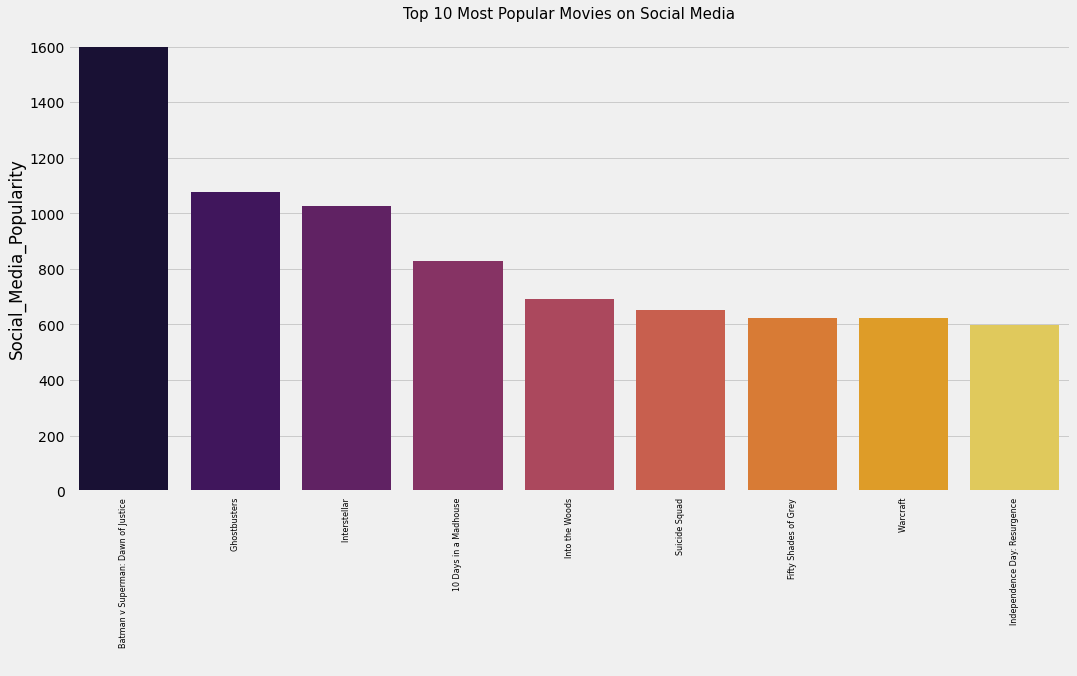

In [261]:
# Calculate social media popularity of a movie
data['Social_Media_Popularity'] =  (data['num_user_for_reviews']/data['num_voted_users'])*data['movie_facebook_likes']

# Top 10 popular movies on Social Media
x = data[['movie_title','Social_Media_Popularity']].sort_values(by='Social_Media_Popularity',ascending=False).head(10).reset_index()
print(x)

# Plotting the values
sns.barplot(x['movie_title'],x['Social_Media_Popularity'], palette = 'inferno')
plt.title('Top 10 Most Popular Movies on Social Media',fontsize=15)
plt.xticks(rotation=90, fontsize=8)
plt.xlabel(' ')
plt.show()

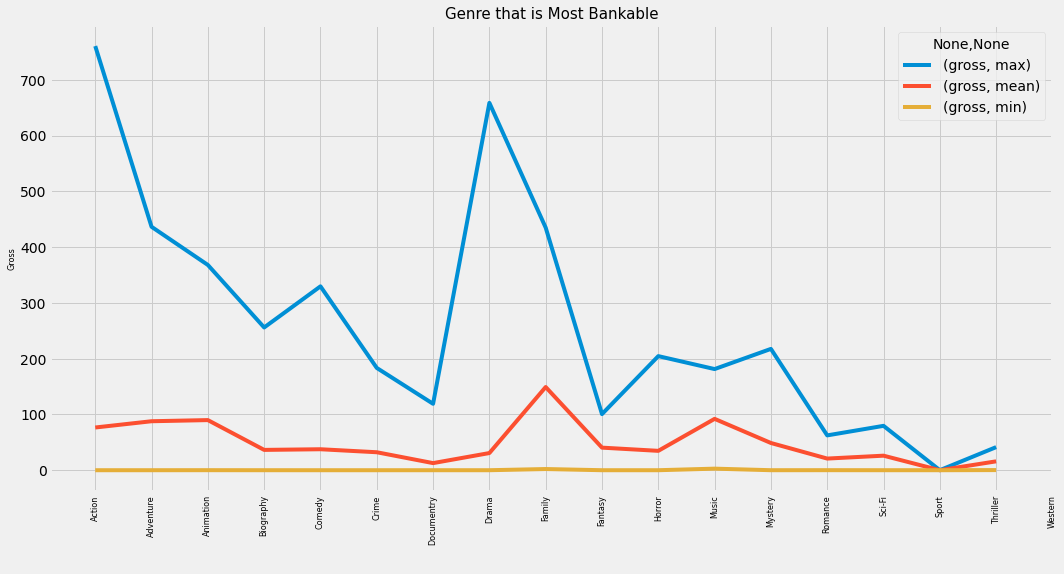

In [262]:
# Compare gross with genres

# Grouping genres and getting average, minimum and maximum gross of movies
display(data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).style.background_gradient(cmap = 'Wistia'))

# Plot the values using lineplot
data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).plot(kind='line')
plt.title('Genre that is Most Bankable',fontsize=15)
plt.xticks(np.arange(18),['Action','Adventure','Animation','Biography','Comedy','Crime','Documentry','Drama','Family',
                           'Fantasy','Horror','Music','Mystery','Romance','Sci-Fi','Sport','Thriller','Western'],rotation=90, fontsize=8)
plt.ylabel('Gross',fontsize=8)
plt.xlabel(' ',)
plt.show()


In [263]:
print('Most profitable movies for each Genre')
display(data.loc[data.groupby(data['Genre1'])['Profit'].idxmax()][['Genre1','movie_title','gross']].style.background_gradient(cmap = 'copper'))

Most profitable movies for each Genre


,Genre1,movie_title,gross
0,Action,Avatar,760.505847
509,Adventure,The Lion King,422.783777
521,Animation,Despicable Me 2,368.049635
1403,Biography,The Blind Side,255.950375
836,Comedy,Forrest Gump,329.691196
3466,Crime,The Godfather,134.821952
3583,Documentary,Fahrenheit 9/11,119.078393
26,Drama,Titanic,658.672302
3080,Family,E.T. the Extra-Terrestrial,434.949459
2485,Fantasy,The Others,96.471845


In [264]:
# Convert year into integer
data['title_year'] = data['title_year'].astype('int')


In [265]:
print('Most profitable Years in Box Office')
display(data[['title_year','language','Profit']].groupby(['language','title_year']).agg('sum').sort_values(by='Profit',ascending=False).head(10).style.background_gradient(cmap = 'Blues'))

Most profitable Years in Box Office


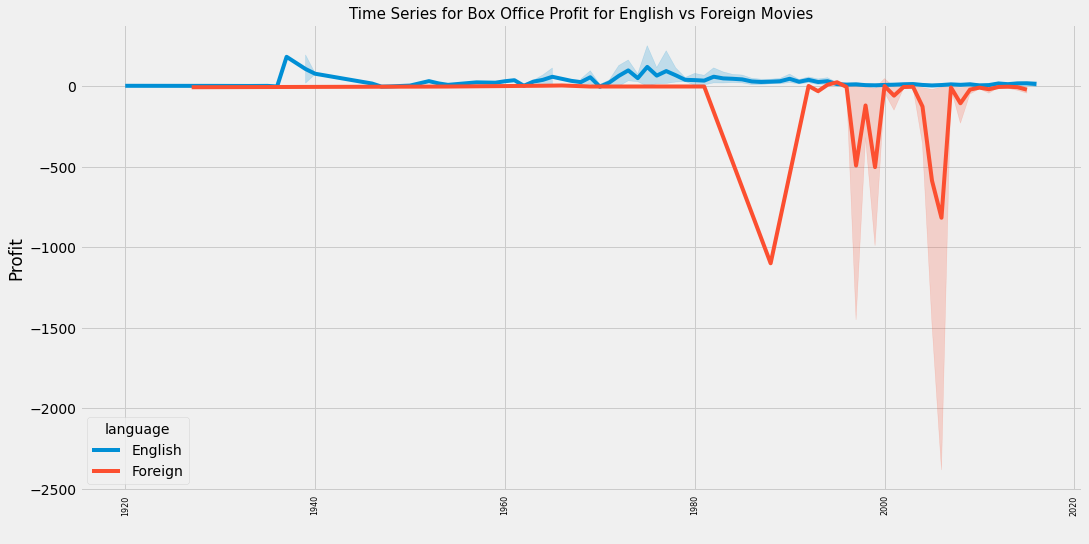

In [266]:
# Plotting the values
sns.lineplot(data['title_year'],data['Profit'], hue = data['language'])
plt.title('Time Series for Box Office Profit for English vs Foreign Movies',fontsize=15)
plt.xticks(rotation=90, fontsize=8)
plt.xlabel(' ')
plt.show()

In [267]:
print('Movies that made huge losses')
display(data[data['Profit'] < -2000][['movie_title','language','Profit']].style.background_gradient(cmap = 'Reds'))

Movies that made huge losses


,movie_title,language,Profit
2323,Princess Mononoke,Foreign,-2397.701809
2334,Steamboy,Foreign,-2127.109510
2988,The Host,Foreign,-12213.298588
3005,Fateless,Foreign,-2499.804112
3859,Lady Vengeance,Foreign,-4199.788333


In [268]:
# Gross comparision of long and short movies
display(data[data['duration'] == 'Long'][['movie_title','duration','gross','Profit']].sort_values(by='Profit',ascending=False).head().style.background_gradient(cmap = 'Greens'))
display(data[data['duration'] == 'Short'][['movie_title','duration','gross','Profit']].sort_values(by='Profit',ascending=False).head().style.background_gradient(cmap = 'Greens'))

,movie_title,duration,gross,Profit
0,Avatar,Long,760.505847,523.505847
29,Jurassic World,Long,652.177271,502.177271
26,Titanic,Long,658.672302,458.672302
3024,Star Wars: Episode IV - A New Hope,Long,460.935665,449.935665
17,The Avengers,Long,623.279547,403.279547


,movie_title,duration,gross,Profit
3080,E.T. the Extra-Terrestrial,Short,434.949459,424.449459
509,The Lion King,Short,422.783777,377.783777
812,Deadpool,Short,363.024263,305.024263
521,Despicable Me 2,Short,368.049635,292.049635
338,Finding Nemo,Short,380.838870,286.838870


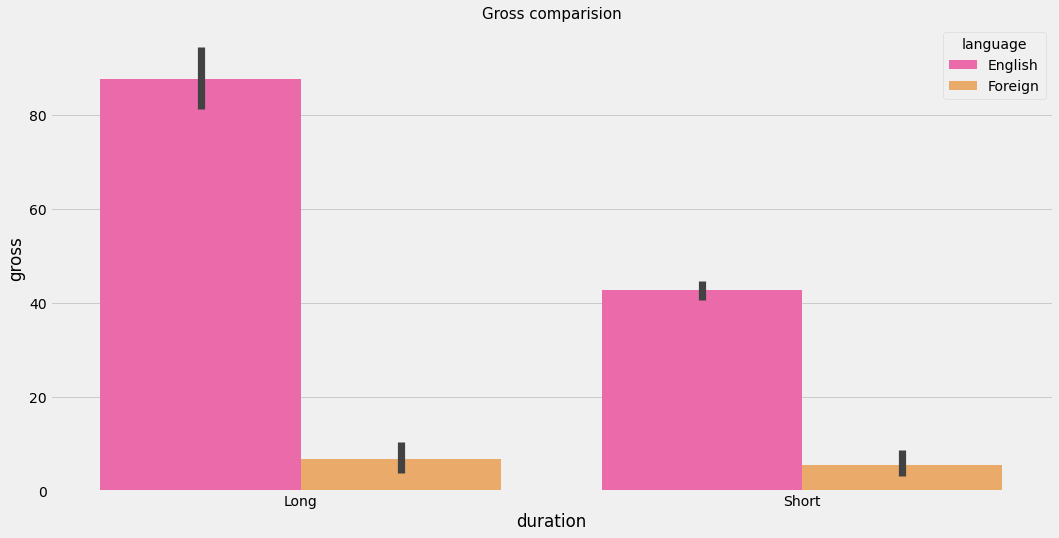

In [269]:
# Plot the values
sns.barplot(data['duration'],data['gross'], hue = data['language'],palette = 'spring')
plt.title('Gross comparision',fontsize=15)
plt.show()

In [270]:
# Relation between IMDB Rating and Duration
print('Average IMDB Score for Long Duration Movies is {0:.2f}'.format(data[data['duration'] == 'Long']['imdb_score'].mean()))
print('Average IMDB Score for Short Duration Movies is {0:.2f}'.format(data[data['duration'] == 'Short']['imdb_score'].mean()))

Average IMDB Score for Long Duration Movies is 7.06
Average IMDB Score for Short Duration Movies is 6.28


In [271]:
print('Highest Rated Long Duration Movies\n',
      data[data['duration'] == 'Long'][['movie_title','imdb_score']].sort_values(by='imdb_score',ascending=False).head(1))

print('Highest Rated Short Duration Movies\n',
      data[data['duration'] == 'Short'][['movie_title','imdb_score']].sort_values(by='imdb_score',ascending=False).head(1))

Highest Rated Long Duration Movies
                     movie_title  imdb_score
1937  The Shawshank Redemption          9.3
Highest Rated Short Duration Movies
               movie_title  imdb_score
3592  The Usual Suspects          8.6


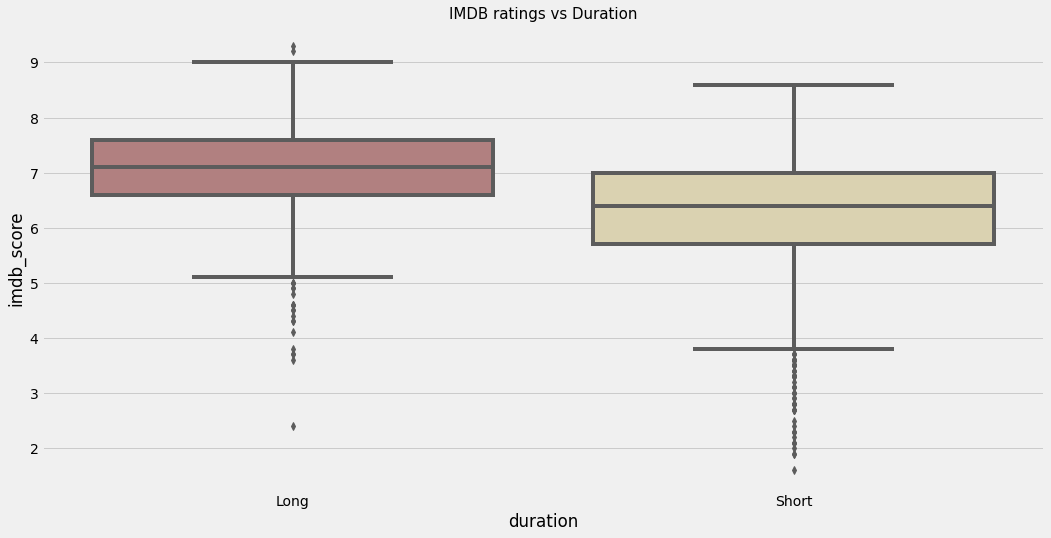

In [272]:
# Plot the values
sns.boxplot(data['duration'],data['imdb_score'],palette = 'pink')
plt.title('IMDB ratings vs Duration',fontsize=15)
plt.show()

In [273]:

def query_actors(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    
    y = y[['movie_title','budget','gross',
          'title_year','genres','language','imdb_score']]
    
    return y  

In [274]:
query_actors('Meryl Streep')

,movie_title,budget,gross,title_year,genres,language,imdb_score
410,It's Complicated,85.0,112.703470,2009,Comedy|Drama|Romance,English,6.6
1106,The River Wild,45.0,46.815748,1994,Action|Adventure|Crime|Thriller,English,6.3
1204,Julie & Julia,40.0,94.125426,2009,Biography|Drama|Romance,English,7.0
1408,The Devil Wears Prada,35.0,124.732962,2006,Comedy|Drama|Romance,English,6.8
1483,Lions for Lambs,35.0,14.998070,2007,Drama|Thriller|War,English,6.2
1575,Out of Africa,31.0,87.100000,1985,Biography|Drama|Romance,English,7.2
1618,Hope Springs,30.0,63.536011,2012,Comedy|Drama|Romance,English,6.3
1674,One True Thing,30.0,23.209440,1998,Drama,English,7.0
1925,The Hours,25.0,41.597830,2002,Drama|Romance,English,7.6
2781,The Iron Lady,13.0,29.959436,2011,Biography|Drama|History,English,6.4


In [275]:
def actors_report(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    print('Time:',y['title_year'].min(),y['title_year'].max())
    print('Max Gross : {0:.2f} Millions'.format(y['gross'].max()))
    print('Average Gross : {0:.2f} Millions'.format(y['gross'].mean()))
    print('Min Gross : {0:.2f} Millions'.format(y['gross'].min()))
    print('Number of 100 Million Movies',y[y['gross']>100].shape[0])
    print('Average IMDB Rating : {0:.2f} '.format(y['imdb_score'].mean()))
    print('Most Common Genres: \n',y['Genre1'].value_counts().head())
actors_report('Meryl Streep')

Time: 1985 2014
Max Gross : 143.70 Millions
Average Gross : 55.23 Millions
Min Gross : 9.66 Millions
Number of 100 Million Movies 4
Average IMDB Rating : 6.81 
Most Common Genres: 
 Drama        9
Comedy       7
Biography    3
Adventure    3
Action       1
Name: Genre1, dtype: int64


In [276]:
# Comparing Critically acclaimed Actors
def critically_acclaimed_actors(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    return y['num_critic_for_reviews'].sum().astype('int')

print('Number of Critic Reviews for Brad Pitt')
display(critically_acclaimed_actors('Brad Pitt'))
print('Number of Critic Reviews for Leonardo DiCaprio')
display(critically_acclaimed_actors('Leonardo DiCaprio'))
print('Number of Critic Reviews for Tom Cruise')
display(critically_acclaimed_actors('Tom Cruise'))

Number of Critic Reviews for Brad Pitt


7814

Number of Critic Reviews for Leonardo DiCaprio


7014

Number of Critic Reviews for Tom Cruise


6740

In [277]:
# Top movies based on IMDB
pd.set_option('max_rows',100)

@interact
def show_movies(column='imdb_score',score=9.0):
    x = data.loc[data[column]>score][['movie_title','title_year',
                                     'actor_1_name','actor_2_name','actor_3_name',
                                     'Profit','imdb_score']]
    x = x.sort_values(by='imdb_score',ascending=False)
    x = x.drop_duplicates(keep='first')
    return x

interactive(children=(Text(value='imdb_score', description='column'), FloatSlider(value=9.0, description='scor…

In [278]:
# Top movies based on Gross
pd.set_option('max_rows',100)

@interact
def show_articles(column=['budget','gross'],x=1000):
    return data.loc[data[column]>x][['movie_title','title_year','duration','gross',
                                     'Profit','imdb_score']]

interactive(children=(Dropdown(description='column', options=('budget', 'gross'), value='budget'), IntSlider(v…

In [279]:
# Recommending Movies based on Languages
def recommend_movies(x):
    y = data[['movie_title','language','imdb_score']][data['language']==x]
    y = y.sort_values(by='imdb_score',ascending=False)
    return y.head(10)

In [280]:
recommend_movies('Foreign')

,movie_title,language,imdb_score
4498,"The Good, the Bad and the Ugly",Foreign,8.9
4029,City of God,Foreign,8.7
4747,Seven Samurai,Foreign,8.7
2373,Spirited Away,Foreign,8.6
4921,Children of Heaven,Foreign,8.5
4259,The Lives of Others,Foreign,8.5
3931,Samsara,Foreign,8.5
4659,A Separation,Foreign,8.4
1329,Baahubali: The Beginning,Foreign,8.4
2970,Das Boot,Foreign,8.4


In [281]:
# Recommending Movies based on Actors
def recommend_movies_actors(x):
    a = data[['movie_title','imdb_score']][data['actor_1_name'] == x]
    b = data[['movie_title','imdb_score']][data['actor_2_name'] == x]
    c = data[['movie_title','imdb_score']][data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    y = y.sort_values(by='imdb_score',ascending=False)
    return y.head(10)

In [282]:
recommend_movies_actors('Brad Pitt')

,movie_title,imdb_score
683,Fight Club,8.8
1600,Se7en,8.6
3017,Snatch,8.3
588,Inglourious Basterds,8.3
2898,True Romance,8.0
101,The Curious Case of Benjamin Button,7.8
400,Ocean's Eleven,7.8
470,Fury,7.6
940,Interview with the Vampire: The Vampire Chroni...,7.6
956,Moneyball,7.6


In [283]:
from mlxtend.preprocessing import TransactionEncoder
x = data['genres'].str.split('|')
te = TransactionEncoder()
x = te.fit_transform(x)
x = pd.DataFrame(x, columns=te.columns_)
x.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [284]:
genres = x.astype('int')
genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [285]:
genres.insert(0,'movie_title',data['movie_title'])
genres.head()

,movie_title,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Avatar,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Spectre,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,The Dark Knight Rises,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,NaN,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [286]:
genres = genres.set_index('movie_title')
genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Spectre,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
The Dark Knight Rises,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
NaN,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [287]:
# Recommending Similar Genres
def recommend_genres(gen):
    gen = genres[gen]
    similar_genres = genres.corrwith(gen)
    similar_genres = similar_genres.sort_values(ascending = False)
    similar_genres = similar_genres.iloc[1:]
    return similar_genres.head(3)


In [288]:
recommend_genres('Action')

Adventure    0.320686
Thriller     0.303907
Sci-Fi       0.295135
dtype: float64

In [289]:
x = genres.transpose()
x.head()

movie_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,NaN,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,...,25th Hour,NaN,Bound,Requiem for a Dream,NaN,Tango,NaN,Moms' Night Out,Donnie Darko,NaN
Action,1,1,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
Adventure,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Biography,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Comedy,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [290]:
# Recommending Similar Movies
def recommend_movies(movie):
    movie = x[movie+'\xa0']
    similar_movies = x.corrwith(movie)
    similar_movies = similar_movies.sort_values(ascending = False)
    similar_movies = similar_movies.iloc[1:]
    return similar_movies.head()


In [291]:
recommend_movies('The Expendables')

movie_title
Pitch Perfect          1.0
Something Borrowed     1.0
NaN                    1.0
Hamlet                 1.0
The Girl Next Door     1.0
dtype: float64